In [1]:
import yfinance
import mplfinance as mpf
import matplotlib. pyplot as plt
import numpy as np

from stockstats import StockDataFrame

# Download Data

In [2]:
data = yfinance.download(
            tickers=['AAPL'],
            start='2010-01-01',
            end=None,
            interval='1d',
            auto_adjust=True,
            prepost=False
        )

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-12-31,6.526080,6.532816,6.447386,6.452591,352410800
2010-01-04,6.535266,6.568029,6.503114,6.553025,493729600
2010-01-05,6.571091,6.601405,6.529754,6.564355,601904800
2010-01-06,6.564356,6.590383,6.453204,6.459941,552160000
2010-01-07,6.483825,6.491480,6.401150,6.447999,477131200


In [4]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100
2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900
2021-12-22,173.039993,175.860001,172.149994,175.639999,92004100
2021-12-23,175.850006,176.539993,175.279999,176.259995,37111742


# Look Into the Technical Indicators

In [5]:
TECHNICAL_INDICATORS = ['macd', 'macds', 'rsi_30', 'rsi_12', 'rsi_26']

In [6]:
stock = StockDataFrame.retype(data.copy())
for technical_indicator_name in TECHNICAL_INDICATORS:
    oscillator_data = stock[technical_indicator_name]
    data[technical_indicator_name] = oscillator_data

In [7]:
data.head()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2009-12-31,6.526080,6.532816,6.447386,6.452591,352410800,0.000000,0.000000,NaN,NaN,NaN
2010-01-04,6.535266,6.568029,6.503114,6.553025,493729600,0.002253,0.001252,100.000000,100.000000,100.000000
2010-01-05,6.571091,6.601405,6.529754,6.564355,601904800,0.003223,0.002060,100.000000,100.000000,100.000000
2010-01-06,6.564356,6.590383,6.453204,6.459941,552160000,-0.000185,0.001299,50.092795,47.581291,49.840768
2010-01-07,6.483825,6.491480,6.401150,6.447999,477131200,-0.002509,0.000166,47.299857,44.660417,47.034581


In [8]:
data.tail()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700,5.689722,5.702068,60.156667,56.576321,60.081326
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100,5.126242,5.586903,58.879925,54.225854,58.666918
2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900,4.884812,5.446484,60.881869,58.599510,60.898403
2021-12-22,173.039993,175.860001,172.149994,175.639999,92004100,4.851386,5.327465,62.429500,61.851778,62.615219
2021-12-23,175.850006,176.539993,175.279999,176.259995,37111742,4.819369,5.225845,62.785840,62.601613,63.010390


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3017 entries, 2009-12-31 to 2021-12-23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3017 non-null   float64
 1   High    3017 non-null   float64
 2   Low     3017 non-null   float64
 3   Close   3017 non-null   float64
 4   Volume  3017 non-null   int64  
 5   macd    3017 non-null   float64
 6   macds   3017 non-null   float64
 7   rsi_30  3016 non-null   float64
 8   rsi_12  3016 non-null   float64
 9   rsi_26  3016 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 259.3 KB


In [10]:
print('Moving Average Convergence Divergence (MACD)')
print(f'Max: {data["macd"].max()}')
print(f'Min: {data["macd"].min()}')
print('Moving Average Convergence Divergence Signal Line (MACDS)')
print(f'Max: {data["macds"].max()}')
print(f'Min: {data["macds"].min()}')

Moving Average Convergence Divergence (MACD)
Max: 7.486116796784145
Min: -4.591872572460346
Moving Average Convergence Divergence Signal Line (MACDS)
Max: 6.879580243030915
Min: -3.7409361616877113


Macd looks pretty hard to scale with a constants. A MixMax scaler for this feature looks good.

In [11]:
print('Relative Strength Index (RSI)')
print(f'Max: {data["rsi_30"].max()}')
print(f'Min: {data["rsi_30"].min()}')

Relative Strength Index (RSI)
Max: 100.0
Min: 31.029822167472048


RSI is within [0, 100] so scaling it with 100 would be enough to bring the data in [0, 1].

<AxesSubplot:xlabel='Date'>

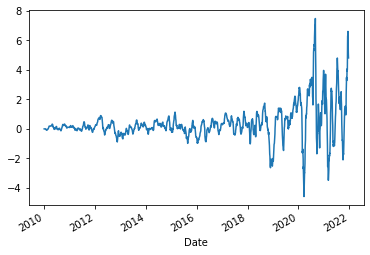

In [12]:
# We can see that the macd data is far from stationary.
# The variance of the data is skyrocketing in the 2020 - 2022 area.
data["macd"].plot()

<AxesSubplot:xlabel='Date'>

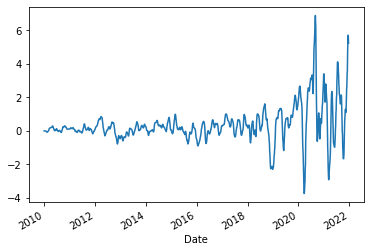

In [13]:
data["macds"].plot()

<AxesSubplot:xlabel='Date'>

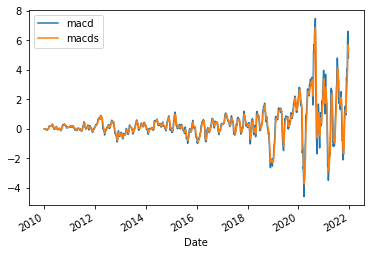

In [14]:
data[["macd", "macds"]].plot()

<AxesSubplot:xlabel='Date'>

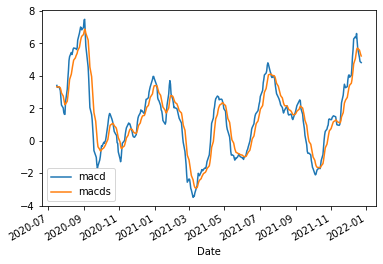

In [17]:
data.iloc[-365:][["macd", "macds"]].plot()

<AxesSubplot:xlabel='Date'>

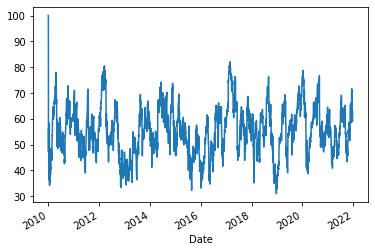

In [15]:
# RSI can be scaled with a min-max scaler easily.
data["rsi_30"].plot()

<AxesSubplot:xlabel='Date'>

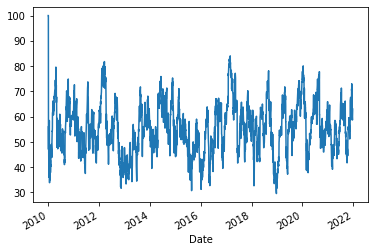

In [19]:
data["rsi_26"].plot()

<AxesSubplot:xlabel='Date'>

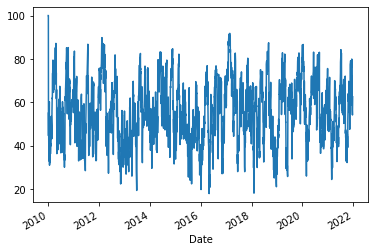

In [20]:
data["rsi_12"].plot()

<AxesSubplot:xlabel='Date'>

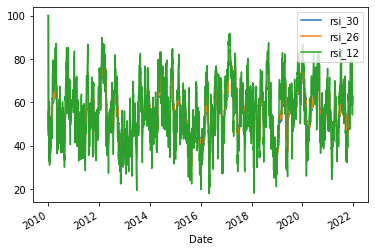

In [21]:
# Not such a big difference. Despite the fact that rsi_12 is more noisy.
data[["rsi_30", "rsi_26", "rsi_12"]].plot()